This just initialises needed variables.

In [57]:
from time import time
import matplotlib.pyplot as plt
import pandas as pandas

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups


n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

This is the fuction which is used to display the results of the different models when used on the data. it displays the categories and the most used words in a bar graph.

In [58]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


Here we load in the data.

In [59]:
t0 = time()
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

done in 2.164s.


the data looks like this.

In [60]:
print(data_samples)

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n", "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap 

In [61]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print(tf)


Extracting tf-idf features for NMF...
done in 3.424s.
Extracting tf features for LDA...
done in 0.484s.
  (0, 881)	1
  (0, 867)	1
  (0, 286)	1
  (0, 862)	1
  (0, 587)	4
  (0, 717)	1
  (0, 488)	2
  (0, 988)	1
  (0, 432)	1
  (0, 527)	1
  (0, 923)	1
  (0, 904)	1
  (0, 748)	1
  (0, 764)	1
  (0, 206)	1
  (0, 841)	1
  (0, 750)	1
  (0, 412)	1
  (0, 567)	1
  (0, 130)	1
  (0, 548)	1
  (0, 493)	1
  (0, 410)	1
  (0, 708)	1
  (1, 345)	1
  :	:
  (1998, 453)	2
  (1998, 209)	1
  (1998, 505)	1
  (1998, 912)	2
  (1998, 578)	1
  (1998, 288)	2
  (1998, 354)	2
  (1998, 911)	1
  (1998, 545)	1
  (1998, 968)	3
  (1998, 436)	1
  (1998, 667)	1
  (1998, 698)	1
  (1998, 970)	1
  (1998, 78)	1
  (1998, 614)	3
  (1998, 289)	2
  (1998, 790)	1
  (1998, 770)	1
  (1998, 331)	1
  (1998, 256)	1
  (1999, 286)	1
  (1999, 356)	1
  (1999, 366)	1
  (1999, 738)	1


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.316s.


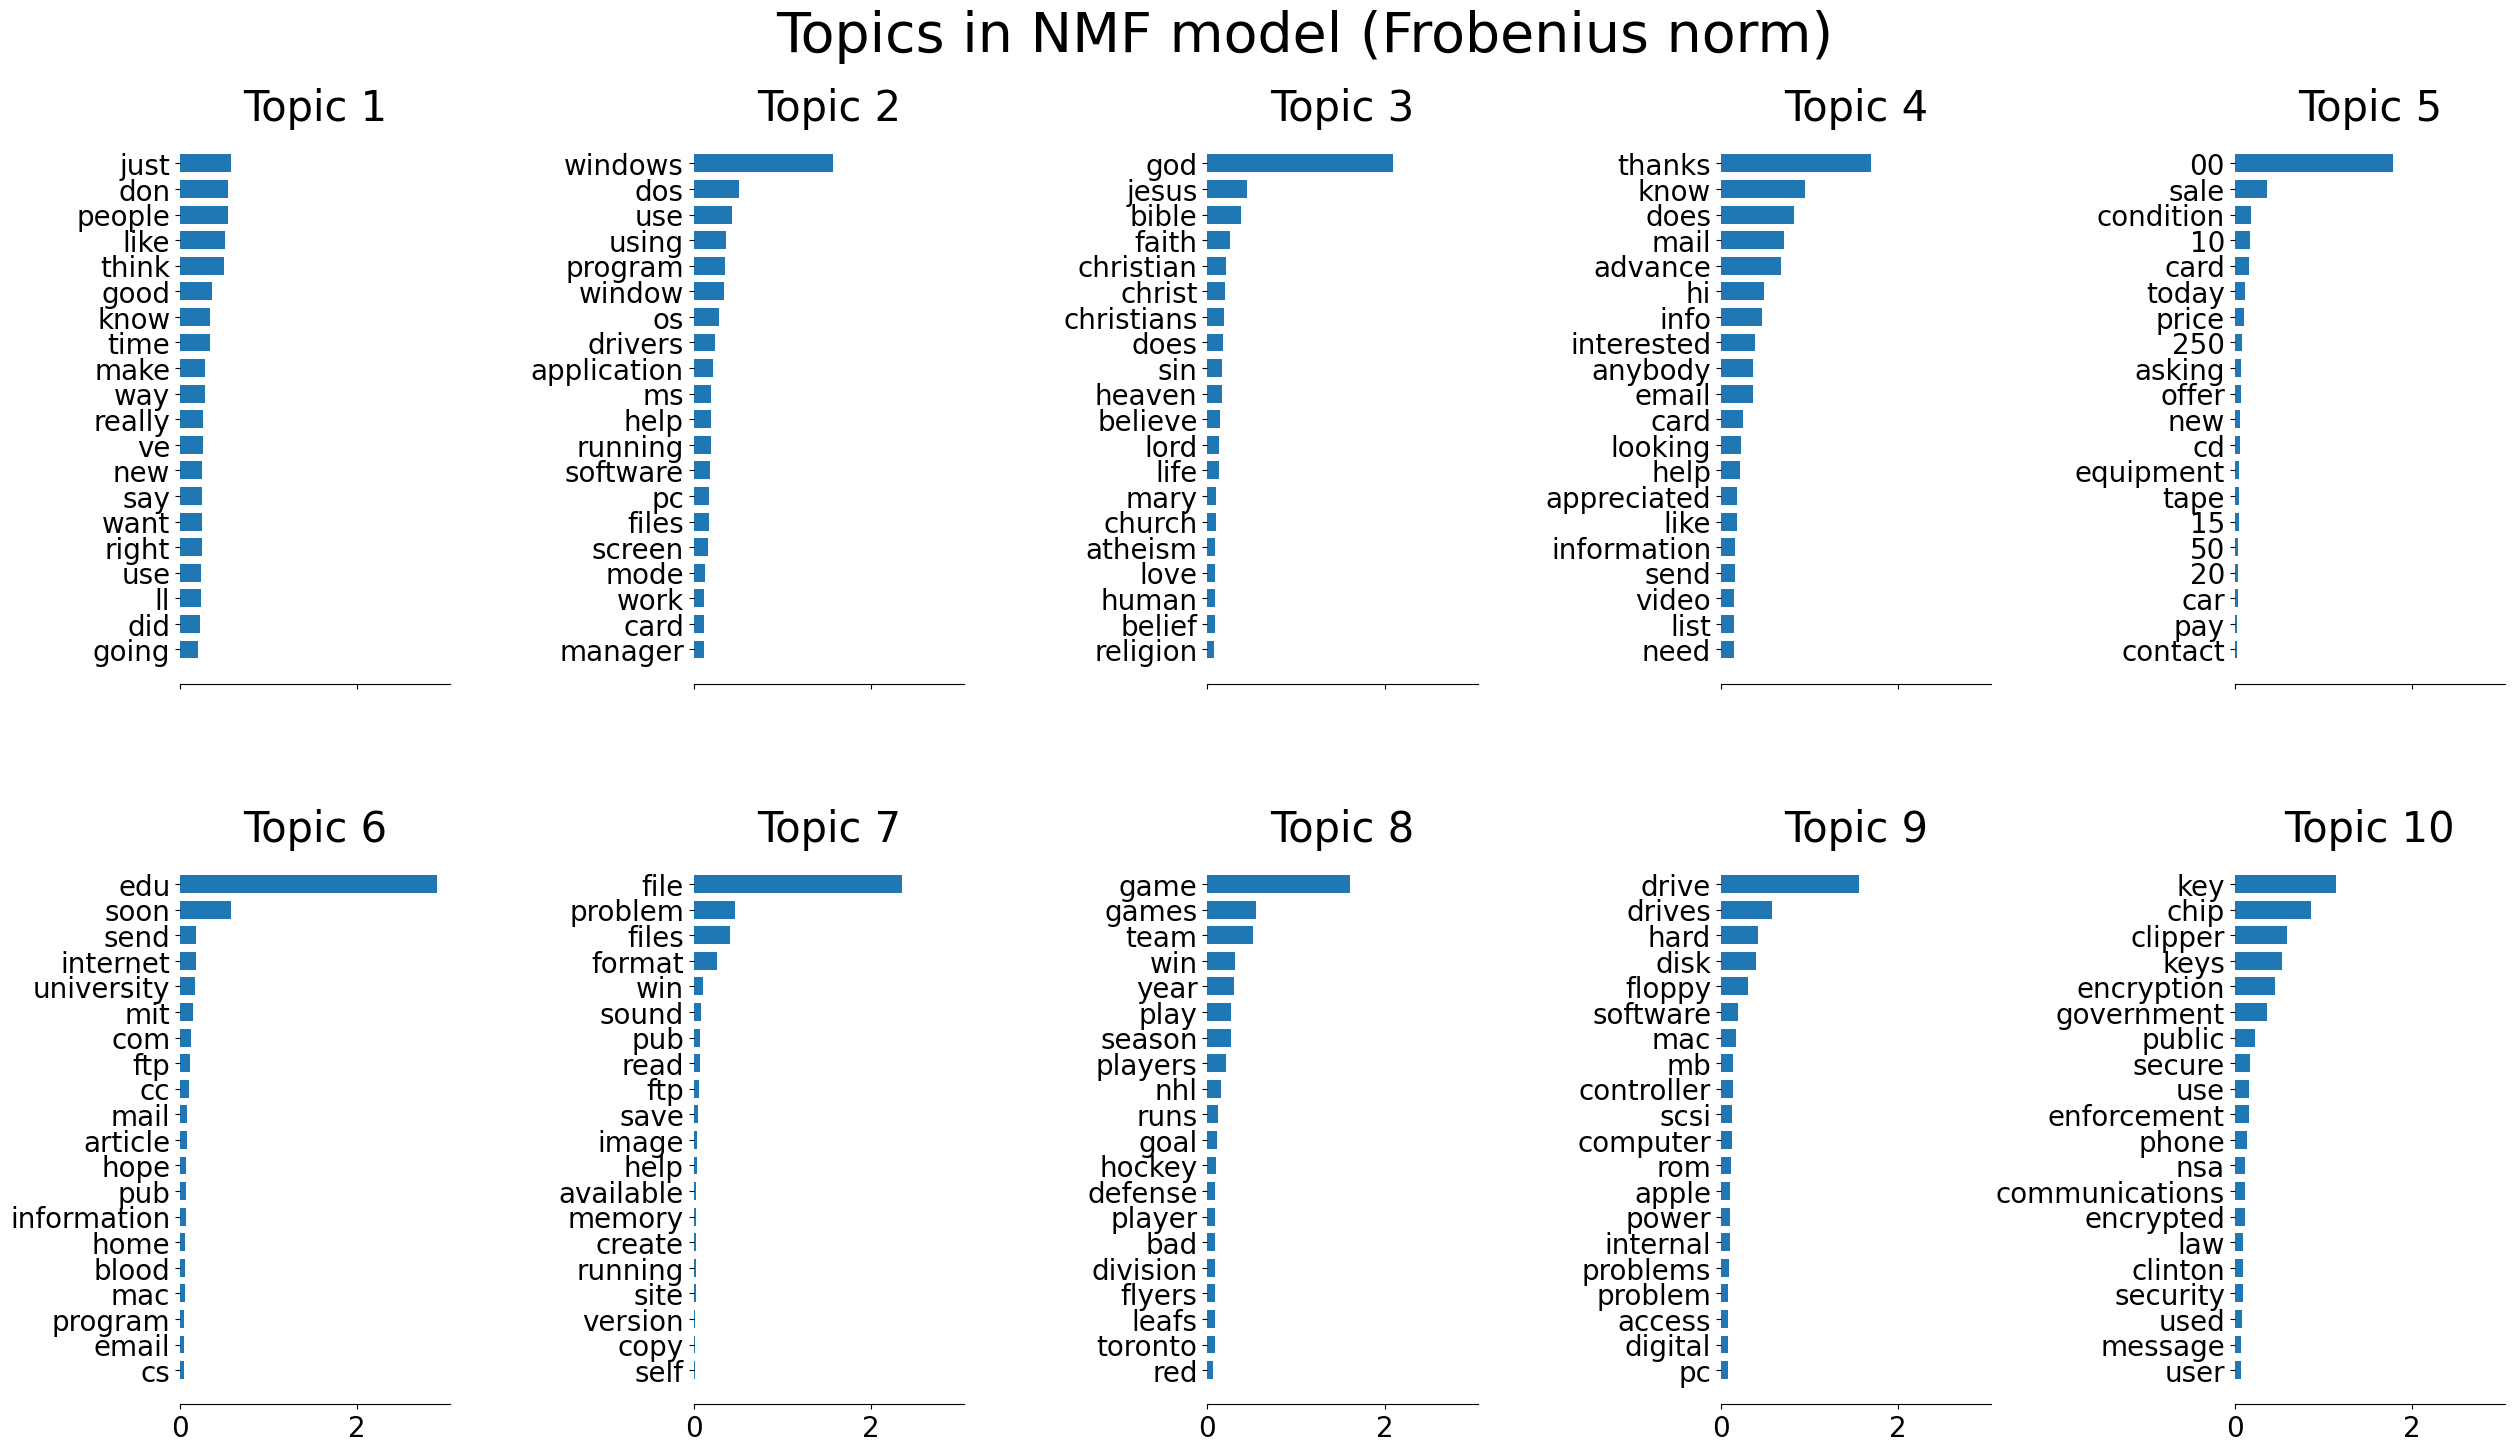

In [62]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)




 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 2.322s.


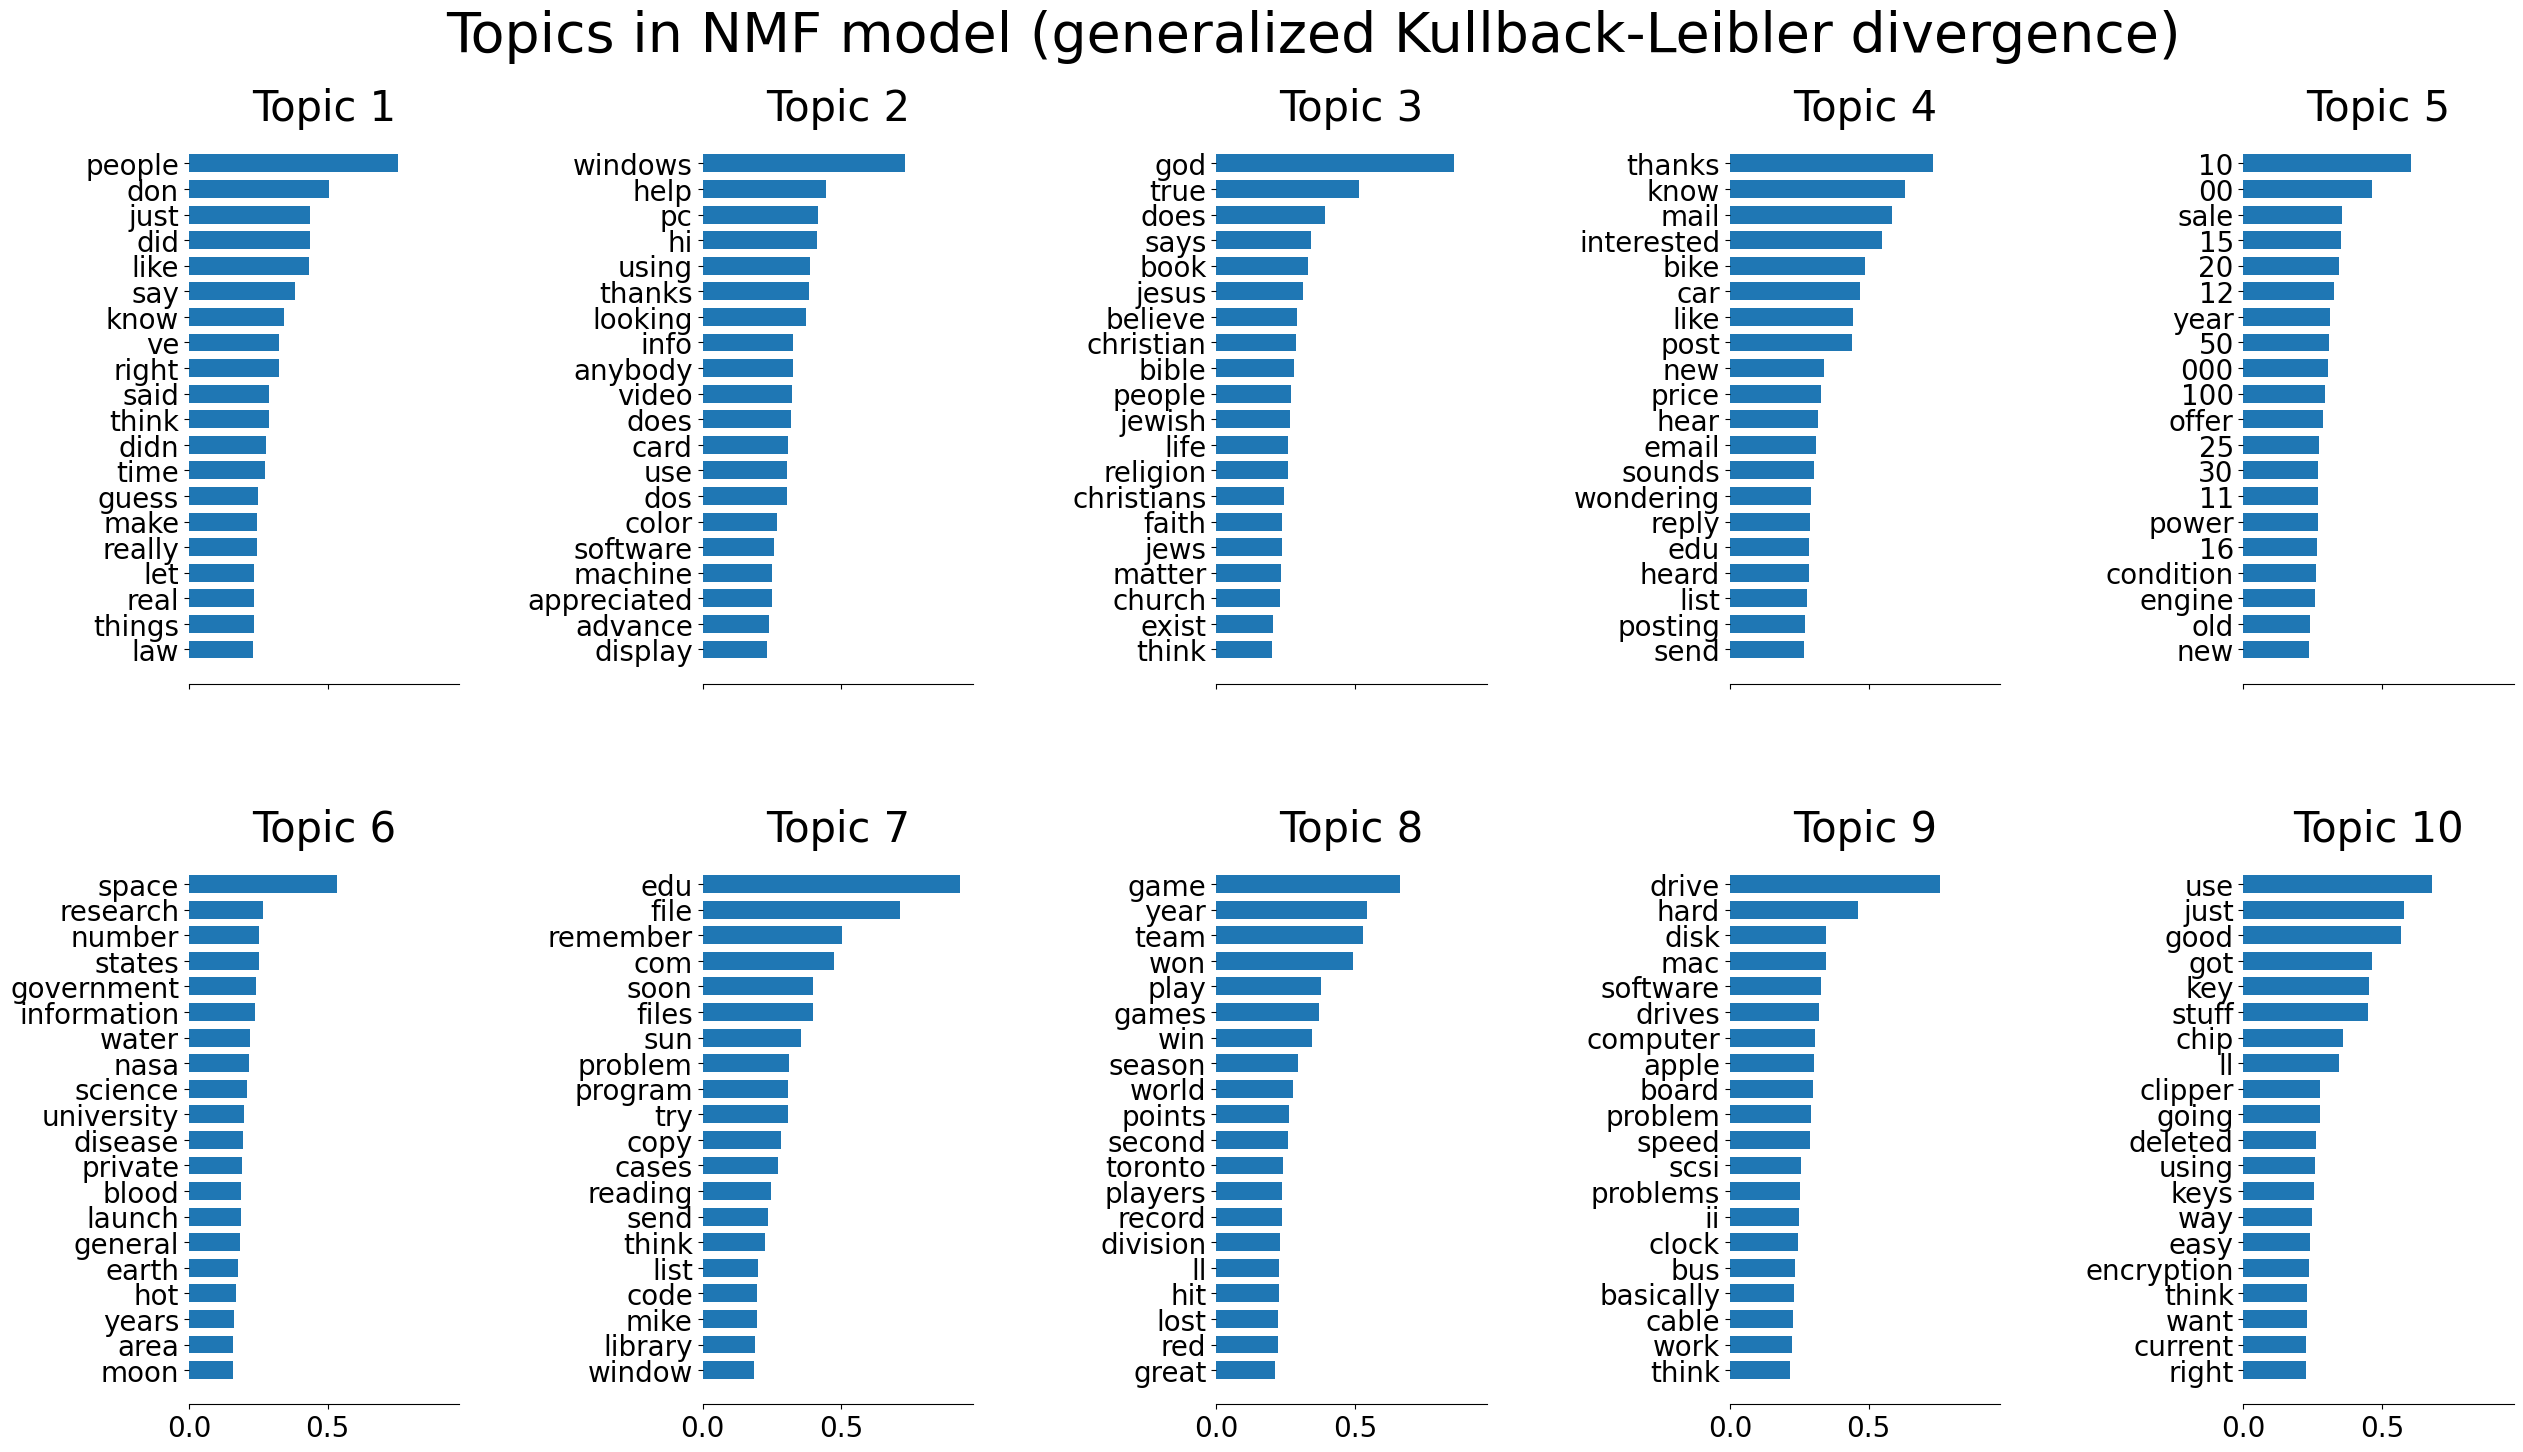

In [63]:
# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)


Now i will try with a different dataset. This data is also text, but is small text each is cattegorised as a emotion. I will try to see if i can run the text through nmf and see if it will categorise the emotions.

Here i will first create a new non csv string, just containing the text part.

In [64]:
df = pandas.read_csv("Emotion_final.csv")
df.drop('Emotion', inplace=True, axis=1)
string = ""
for index, row in df.iterrows():
    string +=row["Text"] + " english."
f = open("new.txt", "w")
f.truncate(0)
f.write(string)
df.head

<bound method NDFrame.head of                                                     Text
0                                i didnt feel humiliated
1      i can go from feeling so hopeless to so damned...
2       im grabbing a minute to post i feel greedy wrong
3      i am ever feeling nostalgic about the fireplac...
4                                   i am feeling grouchy
...                                                  ...
21454               Melissa stared at her friend in dism
21455  Successive state elections have seen the gover...
21456               Vincent was irritated but not dismay
21457  Kendall-Hume turned back to face the dismayed ...
21458                    I am dismayed , but not surpris

[21459 rows x 1 columns]>

In [65]:

print("Extracting tf-idf features for NMF...")
f = open("Emotion_final.csv", "r")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(f)
print("done in %0.3fs." % (time() - t0))
print(tfidf)


Extracting tf-idf features for NMF...
done in 0.564s.
  (1, 718)	0.24893538896771827
  (1, 418)	0.7563125028991673
  (1, 287)	0.1653532876956132
  (1, 196)	0.581962937244409
  (2, 459)	0.3332615001381939
  (2, 405)	0.6333403688076104
  (2, 406)	0.630836379851239
  (2, 288)	0.21194688329855418
  (2, 718)	0.21199228825712751
  (3, 24)	0.2097342758555932
  (3, 990)	0.458942777105146
  (3, 352)	0.4700016278768016
  (3, 646)	0.4276220757704177
  (3, 553)	0.5322463415508318
  (3, 427)	0.21755000925184118
  (3, 287)	0.10491289892849578
  (4, 523)	0.37500471433080573
  (4, 468)	0.45421109000237886
  (4, 587)	0.7681317591591281
  (4, 288)	0.2510724009516477
  (5, 355)	0.8947081188633376
  (5, 24)	0.35682284685769583
  (5, 288)	0.2686537511377745
  (6, 833)	0.37537276553926313
  (6, 945)	0.445687151412644
  :	:
  (21452, 745)	0.33956672864773807
  (21452, 619)	0.23835960404045348
  (21452, 285)	0.17145500915187237
  (21453, 209)	0.42853663216802046
  (21453, 202)	0.38968716804380665
  (21453, 61

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 1.198s.


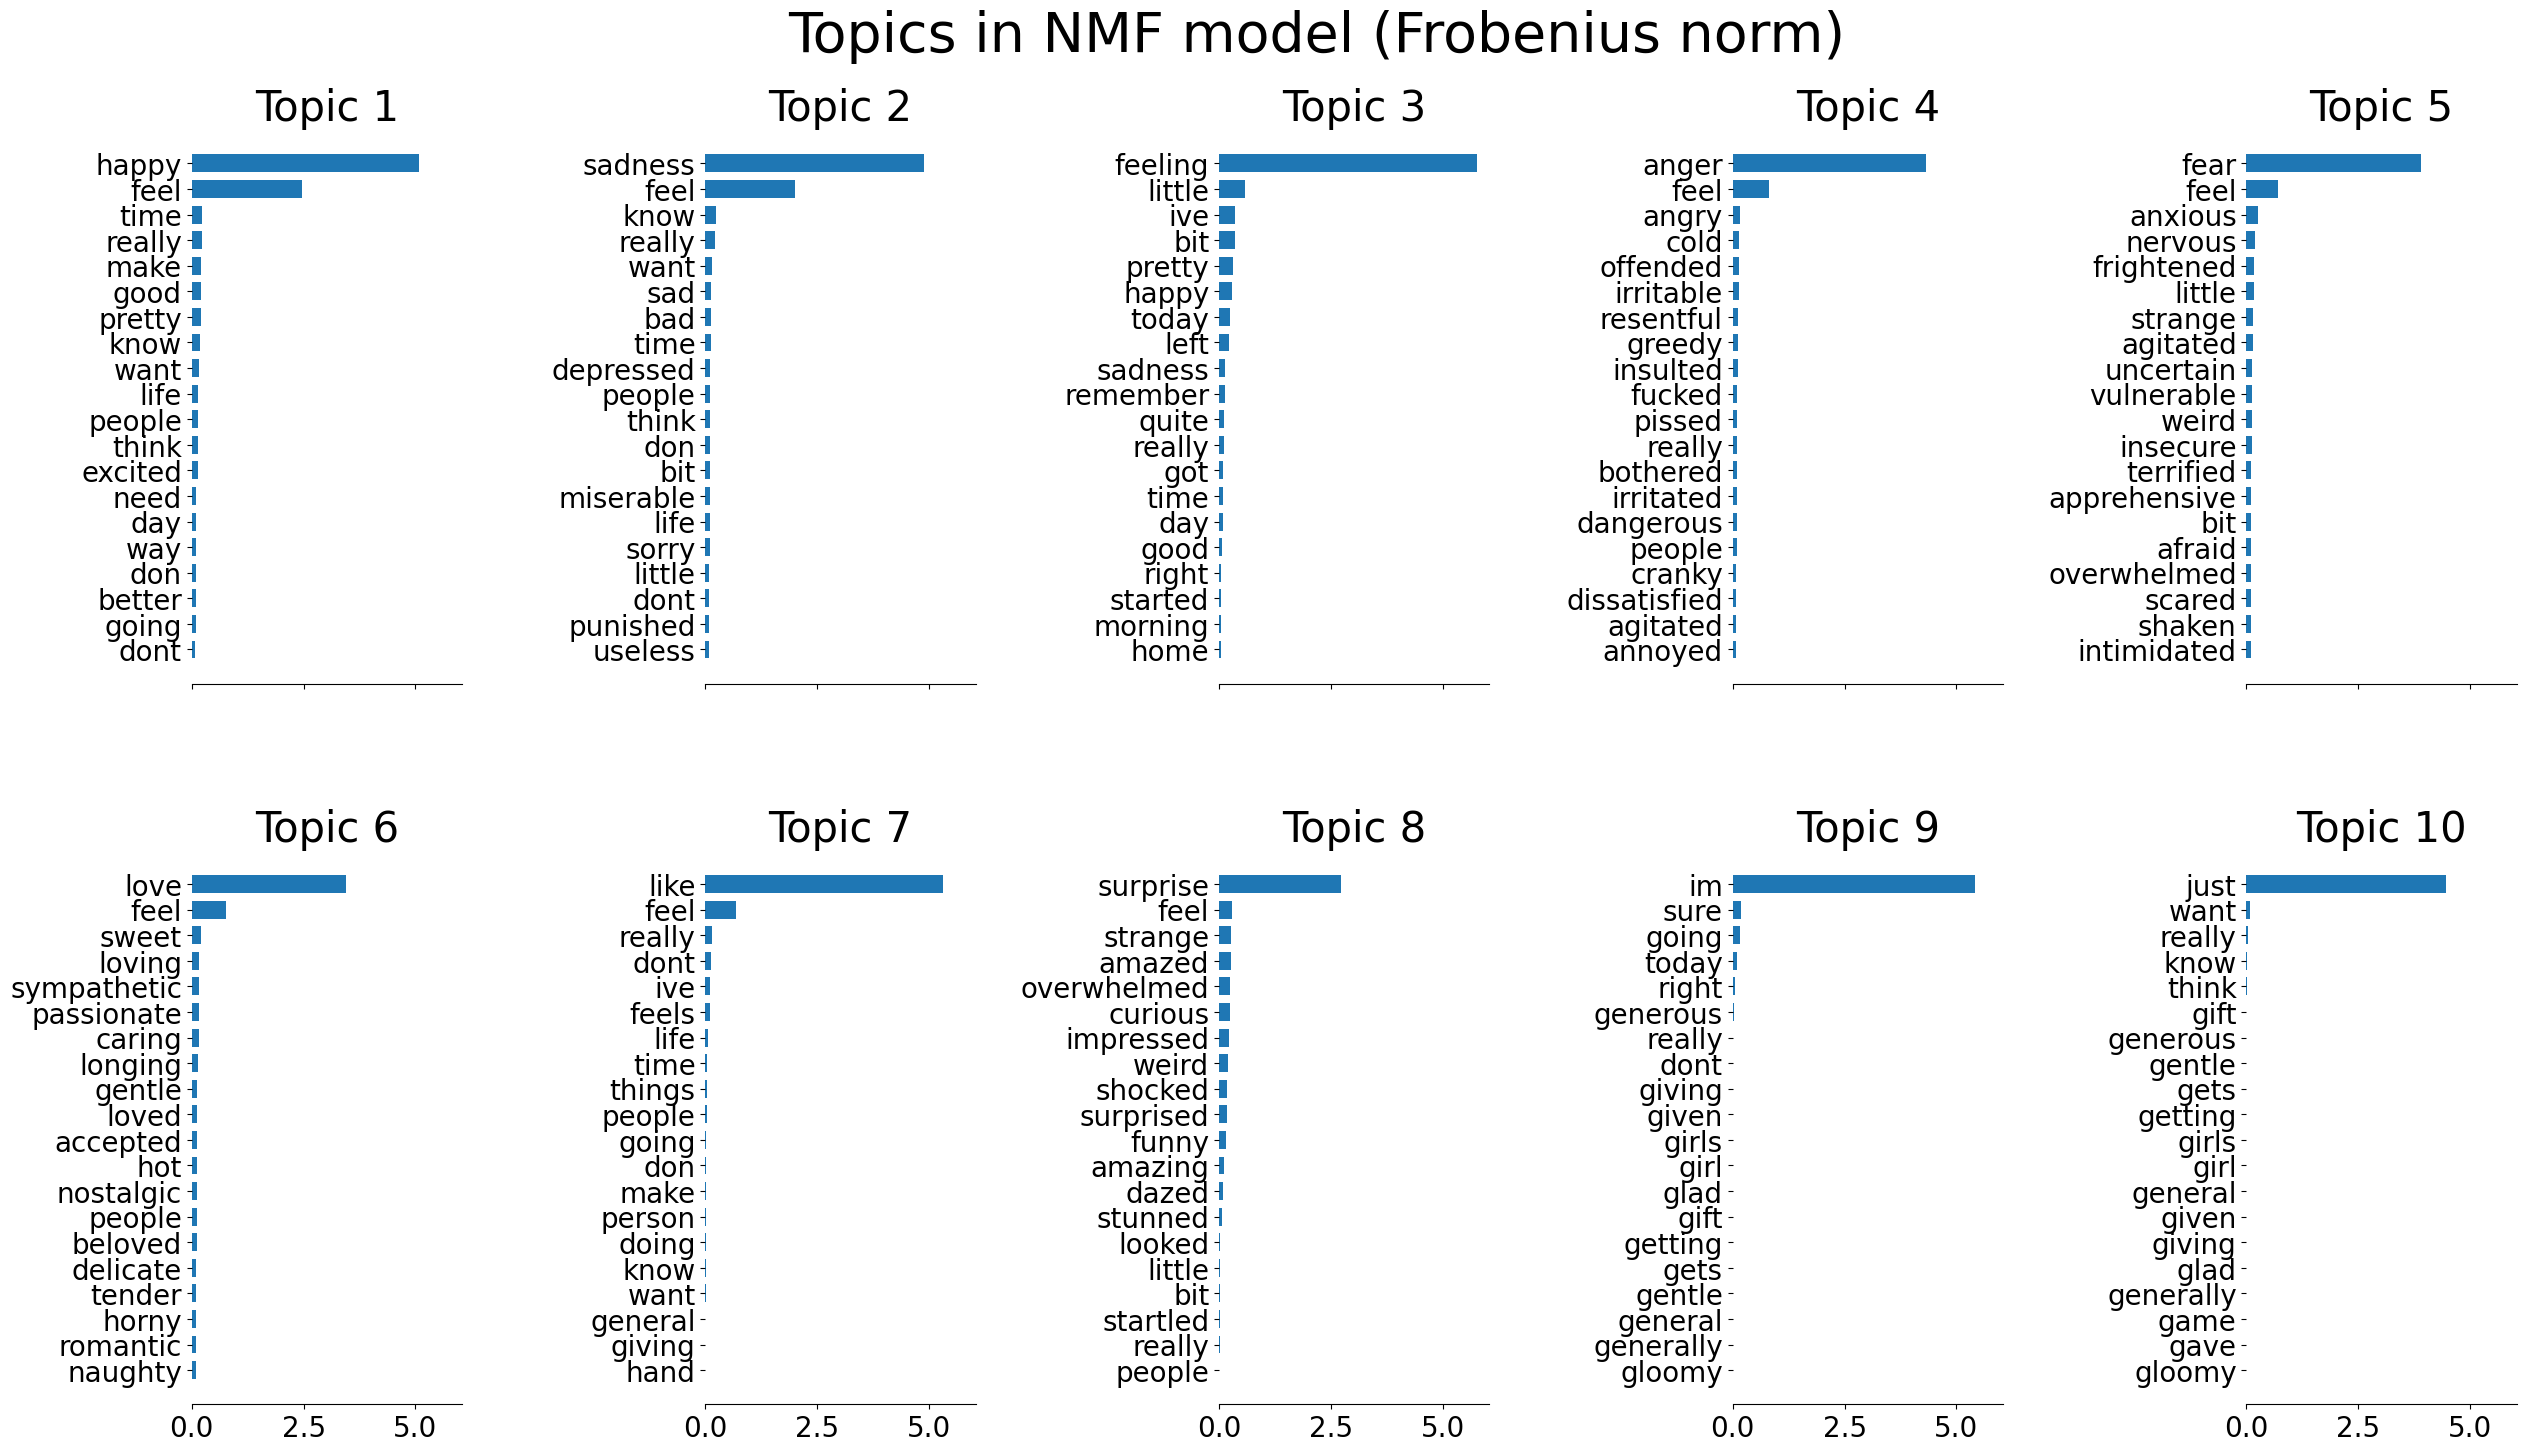

In [66]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)